In [3]:
import numpy as np
a=np.loadtxt('/content/MIA_J-D_T_precip_inches.csv',delimiter=",", dtype='float64')
print(a)

[[1.906e+03 3.200e+00 3.780e+00 ... 7.560e+00 0.000e+00 7.201e+01]
 [1.907e+03 1.480e+00 1.600e-01 ... 3.080e+00 1.190e+00 3.315e+01]
 [1.908e+03 3.460e+00 9.700e-01 ... 1.650e+00 8.600e-01 8.536e+01]
 ...
 [2.020e+03 2.030e+00 2.900e+00 ... 9.600e+00 1.600e+00 8.657e+01]
 [2.021e+03 5.000e-01 2.900e+00 ... 4.380e+00 1.190e+00 6.127e+01]
 [2.022e+03 5.980e+00 1.600e+00 ... 8.490e+00 1.730e+00 7.155e+01]]


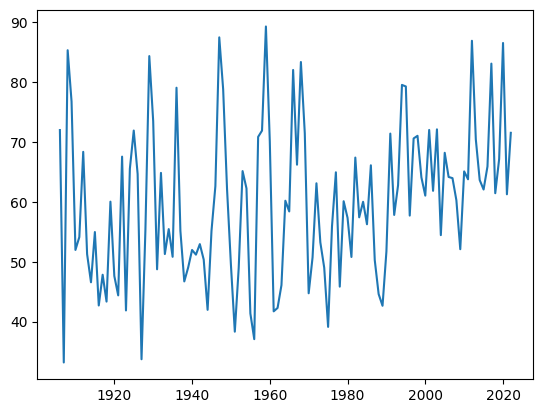

In [4]:
import matplotlib.pyplot as plt
plt.plot(a[:,0],a[:,-1])

In [5]:
import scipy
scipy.stats.describe(np.log(a[:,-1]))

DescribeResult(nobs=117, minmax=(3.5010427166318716, 4.492337377713747), mean=4.0704197771457, variance=0.04806875626955875, skewness=-0.25195734170075235, kurtosis=-0.4070234854000585)

In [8]:
print("standard deviation = ", np.sqrt(165.34288474801065))

standard deviation =  12.858572422629607


(array([ 2.,  3., 10., 11., 16., 15., 27., 18.,  6.,  9.]),
 array([3.50104272, 3.60017218, 3.69930165, 3.79843111, 3.89756058,
        3.99669005, 4.09581951, 4.19494898, 4.29407845, 4.39320791,
        4.49233738]),
 <BarContainer object of 10 artists>)

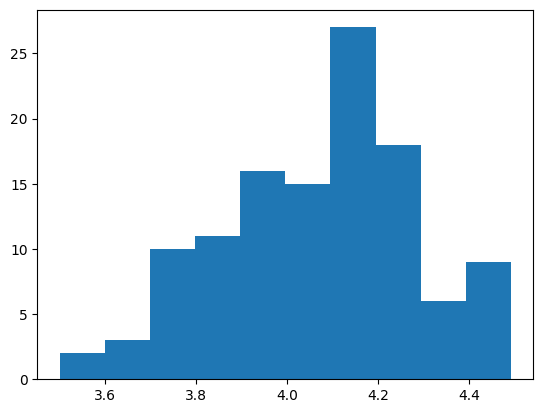

In [9]:
import matplotlib.pyplot as plt

plt.hist(np.log(a[:,-1]))

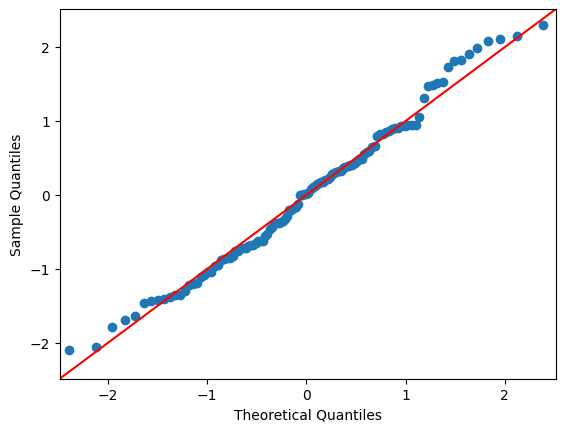

In [10]:
import statsmodels.api as sm #https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.ProbPlot.html
pplot = sm.ProbPlot(a[:,-1],dist=scipy.stats.norm, fit=True)
fig = pplot.qqplot(line="45")



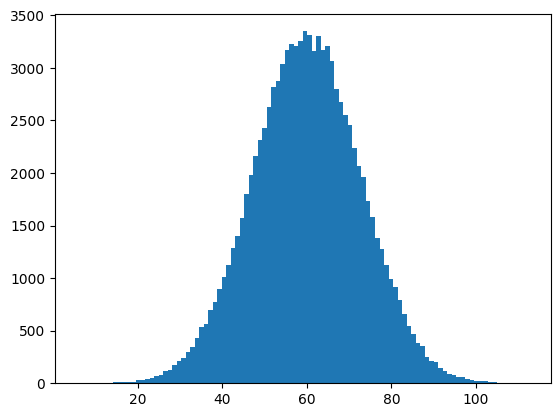

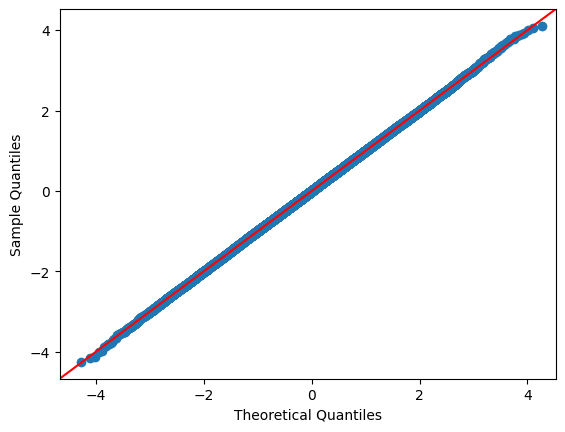

In [11]:
#Here we plot sample from the known normal distribution. Note how much better the q-q plot gets with more samples!
mu, sigma = np.mean(a[:,-1]), np.std(a[:,-1]) # mean and standard deviation
s = np.random.normal(mu, sigma, 100000)

plt.hist(s,bins=100)
pplot = sm.ProbPlot(s,dist=scipy.stats.norm, fit=True)
fig = pplot.qqplot(line="45")

In [12]:

res = scipy.stats.normaltest(a[:,-1])
scipy.stats.normaltest(a[:,-1], axis=0, nan_policy='propagate')


NormaltestResult(statistic=2.626874260560215, pvalue=0.268894241683033)

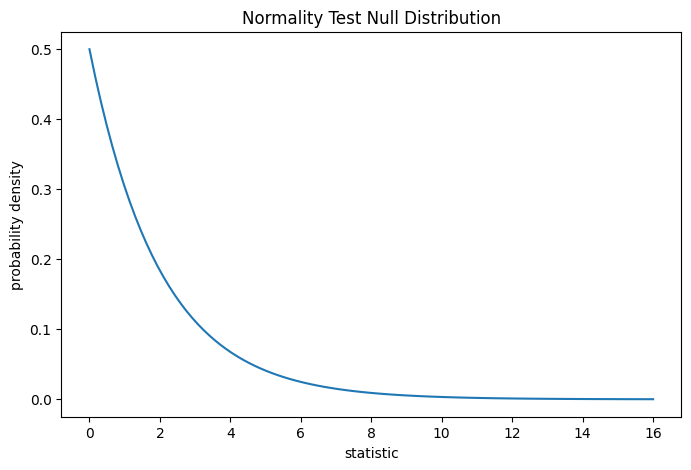

In [13]:
import matplotlib.pyplot as plt
dist = scipy.stats.chi2(df=2)
stat_vals = np.linspace(0, 16, 100)
pdf = dist.pdf(stat_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(stat_vals, pdf)
    ax.set_title("Normality Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

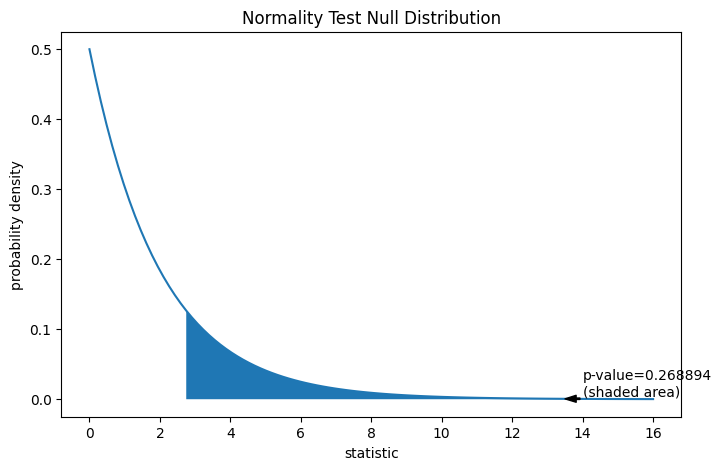

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
pvalue = dist.sf(res.statistic)
annotation = (f'p-value={pvalue:.6f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (13.5, 5e-4), (14, 5e-3), arrowprops=props)
i = stat_vals >= res.statistic  # index more extreme statistic values
ax.fill_between(stat_vals[i], y1=0, y2=pdf[i])
#ax.set_xlim(8, 16)
#ax.set_ylim(0, 0.01)
plt.show()

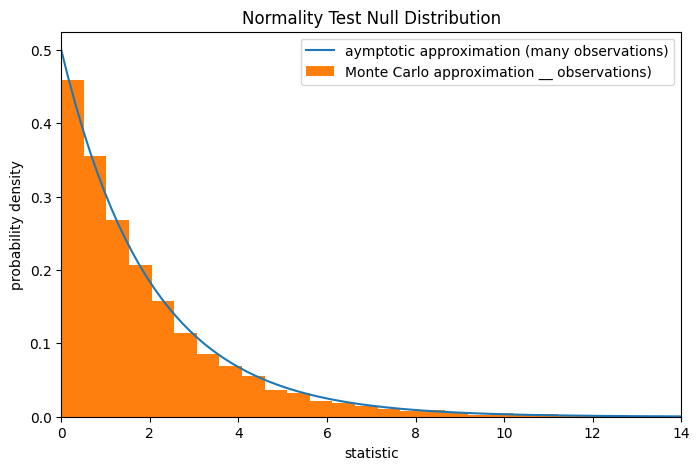

In [15]:
def statistic(x, axis):
...    # Get only the `normaltest` statistic; ignore approximate p-value
...    return scipy.stats.normaltest(x, axis=axis).statistic
res = scipy.stats.monte_carlo_test(a[:,-1], scipy.stats.norm.rvs, statistic, alternative='greater')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(res.null_distribution, np.linspace(0, 25, 50), density=True)
ax.legend(['aymptotic approximation (many observations)', 'Monte Carlo approximation __ observations)'])
ax.set_xlim(0, 14)
plt.show()

Rain =          year   rain
0    1906.0  72.01
1    1907.0  33.15
2    1908.0  85.36
3    1909.0  76.78
4    1910.0  51.97
..      ...    ...
112  2018.0  61.45
113  2019.0  67.15
114  2020.0  86.57
115  2021.0  61.27
116  2022.0  71.55

[117 rows x 2 columns]
Ranked rain =         year   rain  ranked
0    1906.0  72.01    18.0
1    1907.0  33.15   117.0
2    1908.0  85.36     5.0
3    1909.0  76.78    14.0
4    1910.0  51.97    80.0
..      ...    ...     ...
112  2018.0  61.45    55.0
113  2019.0  67.15    33.0
114  2020.0  86.57     4.0
115  2021.0  61.27    56.0
116  2022.0  71.55    21.0

[117 rows x 3 columns]


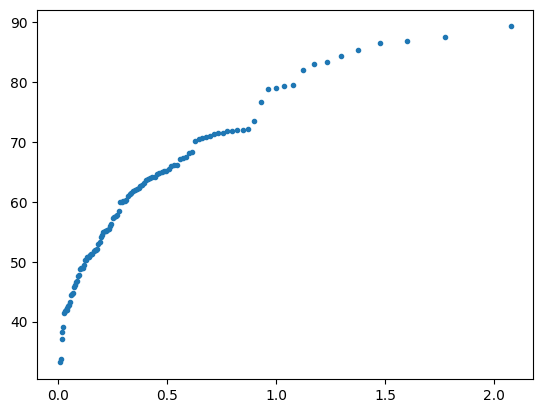

In [67]:
#Rank rain data and percentiles

import pandas as pd
rain_df = pd.DataFrame({'year':a[:,0],'rain':a[:,-1]})
print("Rain =  ", rain_df)

rain_df['ranked'] = rain_df['rain'].rank(ascending = False)
print("Ranked rain = ", rain_df)

rain_ranked_sorted = rain_df.sort_values(by=['ranked'])
rain_ranked_sorted_array = np.array(rain_ranked_sorted)
#print("Sorted ranked rain = ", rain_ranked_sorted_array)

T = 119/np.arange(1,118)
#print("T = ", T)
plt.plot(np.log10(T),rain_ranked_sorted_array[:, 1],'.')



